In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

import random

In [5]:
random.seed(5)
read_data_2 = pd.read_csv('/home/venkatraman/Downloads/handover_23949266/venkatramaan/sample_data_intw.csv')
Empty_values = read_data_2.fillna(0,axis=1)

In [3]:
import numpy as np
from sklearn.model_selection import cross_val_score
X = Empty_values.iloc[:,2:-1]
y = Empty_values.iloc[:,-1]

In [4]:
X_train, X_dev, Y_train, Y_dev  = train_test_split(X, y, train_size=0.80, test_size=0.20)

In [5]:
logreg = BernoulliNB(alpha=10.0, fit_prior=True)
print("Cross Validation Score BernoulliNB: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score BernoulliNB: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score BernoulliNB: 84.90%
Dev Set score BernoulliNB: 85.10%


In [6]:
Y_dev_predict = logreg.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,141,955,1096
1,1048,6237,7285
All,1189,7192,8381


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy for BernoulliNB {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision for BernoulliNB {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall for BernoulliNB {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))

print ("-----------------------------------------------")
print ("-----------------------------------------------")
print ("-----------------------------------------------")

Accuracy for BernoulliNB 0.85
Precision for BernoulliNB 0.92
Recall for BernoulliNB 0.91
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------


In [8]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score DecisionTreeClassifier: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score DecisionTreeClassifier: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score DecisionTreeClassifier: 87.08%
Dev Set score DecisionTreeClassifier: 87.24%


In [9]:
Y_dev_predict = dte.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy for  DecisionTreeClassifier{0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision for DecisionTreeClassifier {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall for DecisionTreeClassifier {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC for  DecisionTreeClassifier{0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy for  DecisionTreeClassifier0.87
Precision for DecisionTreeClassifier 0.93
Recall for DecisionTreeClassifier 0.92
AUC for  DecisionTreeClassifier0.73


In [10]:
accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

In [13]:

# Visualizaing decision tree for Question 2 - detailed feature set
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=X_train.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())
import matplotlib.pyplot as plt

                 Feature  Importance
12  medianmarechprebal30    0.034002
15     sumamnt_ma_rech90    0.046845
5      last_rech_date_ma    0.051182
3               rental30    0.054035
17  medianmarechprebal90    0.054820
4               rental90    0.064166
1           daily_decr30    0.066963
0                    aon    0.080386
13         cnt_ma_rech90    0.104559
2           daily_decr90    0.262387


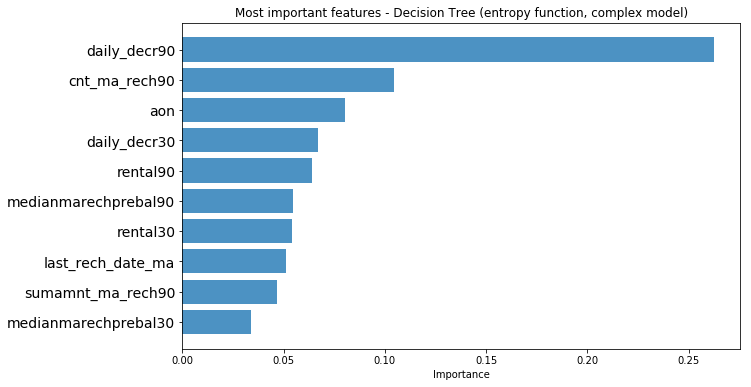

In [12]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy function, complex model)')
plt.show()